안녕하세요, 데이크루 3기 ‘투데이💰︎' 팀입니다!

**팀 투데이**는 “투자에 데이터를 이용하다"의 약자입니다. 

금융 데이터 수집&가공&모델링을 학습하면서 **Financial Domain Knowledge와 Data Analysis Technologies 향상**을 목적으로 하고 있습니다.
<br><br>

저희는 금융데이터와 AI기술이 만나는 전반적인 과정을 학습하고, 학습한 내용을 바탕으로 데이콘 이용자분들을 위한 콘텐츠를 제작하고 있습니다. <br> ‘투데이💰︎’의 첫번째 포스팅의 주제는 ‘금융 데이터수집’입니다. 

아래 링크를 들어가시면 ‘투데이💰︎’의 전 커리큘럼을 보실 수 있습니다. 

→ <a href="https://dacon.io/competitions/official/235946/codeshare/5502">[투데이💰0편] 금융 데이터 분석에 앞서</a>

<br>


📥 PDF파일에 1편 내용이 요약되어 있으니 참고 부탁드리겠습니다. <br>
본 포스팅은 데이콘 서포터즈 “데이크루" 3기 활동의 일환입니다.

# **코드**

## ✏️ 금융 데이터 수집
1. 주가 데이터 수집
2. 거시경제 데이터 수집
3. 기업 공시데이터 수집
4. 금융데이터 핸들링
5. 백테스팅 API 활용법

# 1. 주가 데이터 수집

## 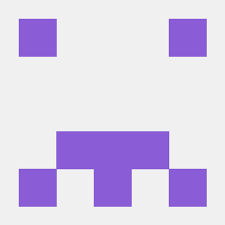 1-1. Pykrx 

https://github.com/sharebook-kr/pykrx <br><br>
Pykrx는 (NAVER·KRX) 에서 주가정보를 스크래핑 합니다. <br>
국내 주가데이터 수집에 특화된 함수가 많습니다. 장중에 사용할 경우, 지연율이 높습니다. <br><br>

대표적으로 사용하는 함수 세가지와 사용되는 용어들도 함께 살펴보겠습니다. <br>
- get_index_ticker_list(index) : 모든 지수(index)의 티커 조회
- get_market_trading_value_by_date(fromdate, todate, ticker) : 투자자별 거래실적 일별추이
- get_index_ohlcv(fromdate, todate, ticker) : 특정 종목의 지정된 기간 OHLCV 조회

In [ ]:
#pip install pykrx

In [ ]:
import pandas as pd
import numpy as np

from pykrx import stock
from pykrx import bond

### get_index_ticker_list(index) <br>
: 모든 지수(index)의 티커를 조회 합니다.
<br><br>

### 여기서 잠깐, **지수(index)**란?
- **정의** : 주가의 변동을 나타내기 위한 지표로써, 지수는 국가, 지역사회의 정치 경제의 상황을 반영하는 지표.<br>
- **배경** : 주식 시장은 개별 주식의 가격, 전체적인 주식의 가격이 순식간에 변화하는 시장입니다. 전체 주식 가격 수준 및 변동 추세를 묘사하고 반영하는 것에 대한 수요에 의해 인덱스, 지수가 만들어지게 된 것입니다. <br>
  
  
<br>

### 여기서 잠깐, **티커(Ticker)**란?
- 종목코드로써 주식 시스템에 증권을 표시할 때 사용하는 약어입니다. <br>
  애플은 APPL, 테슬라는 TSLA, 코카콜라는 KO 등으로 표기됩니다. <br>



In [ ]:
for ticker in stock.get_index_ticker_list()[:10]:
    tickerName = stock.get_index_ticker_name(ticker)
    print(ticker, tickerName)

1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물


### get_market_trading_value_by_date(fromdate, todate, ticker) 
: 투자자별 거래실적 일별추이를 수집합니다.

In [ ]:
samsungTradingResult = stock.get_market_trading_value_by_date("20220101","20220505","005930")
print(samsungTradingResult.head())

                    기관합계        기타법인            개인         외국인합계  전체
날짜                                                                  
2022-01-03 -329791819300  4774451400  184943470500  140073897400   0
2022-01-04 -206326913300  1908886100   91958901300  112459125900   0
2022-01-05 -598003977100 -8062754100  649419857800  -43353126600   0
2022-01-06 -171750680700  3976748900   -3254631500  171028563300   0
2022-01-07 -165044032600 -3880739900 -171571901600  340496674100   0


### get_index_ohlcv(fromdate, todate, ticker) 
: 특정 종목의 지정된 기간 OHLCV 조회합니다.
<br><br>

### 여기서 잠깐, **OHLCV**란?
- **O**pen : 시가, 최초 거래 가격 <br>
- **H**igh : 고가, 가장 높은 거래 가격 <br>
- **L**ow : 저가, 가장 낮은 거래 가격 <br>
- **C**lose : 종가, 마지막 거래 가격 <br>
- **V**olume : 거래량, 높은 거래량은 기관의 매수/매도 증가를 나타내며, 낮은 거래량은 개인투자자들의 매수/매도 구간으로 추정합니다. <br><br>

위 데이터들을 종합하여 OHLC-V 값이라고 하며, 각종 메서드에서 많이 활용 됩니다. <br>
또한 시가, 고가, 저가, 종가의 상관 관계는 추후 캔들스틱의 모양을 결정 합니다. <br>



In [ ]:
Ckospi = stock.get_index_ohlcv("20190101", "20220711", "1001")
kospi[:10]

코스피,시가,고가,저가,종가,거래량,거래대금,상장시가총액
날짜,,,,,,,
2019-01-02,2050.55,2053.45,2004.27,2010.00,326367773,4295871822881,1323645396533233
2019-01-03,2011.81,2014.72,1991.65,1993.70,427976017,5358519356361,1312758913016841
2019-01-04,1992.40,2011.56,1984.53,2010.25,408990897,5490147620731,1323719372668579
2019-01-07,2034.24,2048.06,2030.90,2037.10,440191435,5301385184683,1342381870636242
2019-01-08,2038.68,2042.70,2023.59,2025.27,397831202,4826641977635,1333996220969886
2019-01-09,2034.19,2068.23,2034.19,2064.71,386247767,5532688944833,1360852002032056
2019-01-10,2065.73,2072.81,2057.16,2063.28,382877104,5434257496719,1359857820274138
2019-01-11,2070.36,2076.99,2063.99,2075.57,380061043,4592460536252,1368311381419713
2019-01-14,2070.49,2073.94,2059.46,2064.52,432890569,4941021266486,1360565230505129


##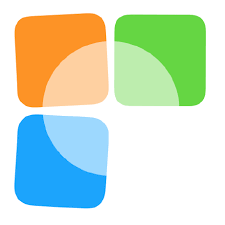 1-2. FinanceDataReader

https://github.com/FinanceData/FinanceDataReader/wiki/<br><br>
FinanceDataReader는 (위키피디아·FRED·Investing·krx·nasdaq) 에서 주가정보를 스크래핑 합니다. <br>
한국/미국 주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리 입니다.

대표적으로 사용하는 함수 두가지를 살펴보겠습니다. <br>
- DataReader(symbol, start, end, exchange, data_source) : 거래소 및 소스에서 가격 데이터 조회
- StockListing(market) : 증권 거래소의 주식 목록 조회

In [ ]:
#pip install finance_datareader

In [ ]:
import FinanceDataReader as fdr

### DataReader(symbol, start, end, exchange, data_source)
: 다양한 거래소(wikipedia·FRED·Investing·krx·nasdaq) 또는 데이터로부터 가격 데이터를 수집하는 메서드 입니다. <br>


In [ ]:
APPLE = fdr.DataReader('AAPL','2022')
APPLE.head(5)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-01-03,182.01,177.83,182.88,177.71,104700000.0,0.0250
2022-01-04,179.70,182.63,182.94,179.12,99310000.0,-0.0127
2022-01-05,174.92,179.61,180.17,174.64,94540000.0,-0.0266
2022-01-06,172.00,172.70,175.30,171.64,96900000.0,-0.0167
2022-01-07,172.17,172.89,174.14,171.03,86710000.0,0.0010


In [ ]:
KOSPI_INDEX = fdr.DataReader('KS11', '2020-01-01')
KOSPI_INDEX.head(5)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,2175.17,2201.21,2202.32,2171.84,494680000.0,-0.0102
2020-01-03,2176.46,2192.58,2203.38,2165.39,631560000.0,0.0006
2020-01-06,2155.07,2154.97,2164.42,2149.95,592670000.0,-0.0098
2020-01-07,2175.54,2166.60,2181.62,2164.27,568240000.0,0.0095
2020-01-08,2151.31,2156.27,2162.32,2137.72,913830000.0,-0.0111


            NASDAQCOM       M2
DATE                          
1971-02-05     100.00      NaN
1971-02-08     100.84      NaN
1971-02-09     100.76      NaN
1971-02-10     100.69      NaN
1971-02-11     101.45      NaN
...               ...      ...
2022-07-05   11322.24  19404.4
2022-07-06   11361.85  19404.4
2022-07-07   11621.35  19404.4
2022-07-08   11635.31  19404.4
2022-07-11   11372.60  19404.4

[13417 rows x 2 columns]


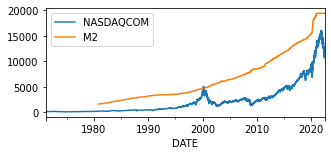

In [ ]:
from matplotlib import pyplot as plt
m2 = fdr.DataReader('M2', data_source='fred')
nq = fdr.DataReader('NASDAQCOM', data_source='fred')
M2_nas = fdr.DataReader(['M2', 'NASDAQCOM'], data_source='fred')
M2_nas.plot(figsize=(5,2))
print(M2_nas)

### StockListing(market)
: 증권 거래소의 주식 목록을 수집하는 메서드 입니다.  <br>
여기서 인자로 들어가는 market에는 아래 표기된 'KRX', 'KOSPI', 'NASDAQ'... 등을 넣어 확인할 수 있습니다. <br><br>

market = 'KRX'-KRX 종목 전체, 'KOSPI'-KOSPI 종목, 'KOSDAQ'-KOSDAQ 종목, 'KONEX'-KONEX 종목, 'NASDAQ'-나스닥 종목, 'NYSE'-뉴욕증권거래소 종목, 'SP500'-S&P500 종목

In [ ]:
stocks = fdr.StockListing('NASDAQ')
stocks.head(5)

100%|██████████| 4629/4629 [00:31<00:00, 146.34it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
4,TSLA,Tesla Inc,자동차 및 자동차 부품,531010


In [ ]:
# 상장폐지 종목 전체 리스트
krx_delisting = fdr.StockListing('KRX-DELISTING')
print(krx_delisting.head(2))

# 관리종목 리스트
krx_adm = fdr.StockListing('KRX-ADMINISTRATIVE')
print(krx_adm.head(2))

     Symbol     Name  Market SecuGroup Kind ListingDate DelistingDate Reason  \
0  06031012     3S R  KOSDAQ   신주인수권증서  보통주  2012-05-14    2012-05-21          
1  00684014  AK홀딩스8R   KOSPI   신주인수권증서  보통주  2014-07-28    2014-08-04          

  ArrantEnforceDate ArrantEndDate Industry  ParValue  ListingShares ToSymbol  \
0               NaT           NaT                0.0      1194422.0            
1               NaT           NaT                0.0      1278299.0            

  ToName  
0         
1         
   Symbol   Name DesignationDate                   Reason
0  001529  동양3우B      2022-01-03    종류주식 상장주식수 미달(5만주 미만)
1  003620    쌍용차      2021-04-16  반기검토의견 의견거절,회생절차개시신청,기타


## 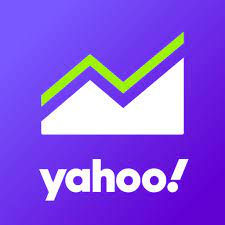 1.3 yfinance

https://pypi.org/project/yfinance/ <br>

yfinance는 Yahoo Finance에서 스크래핑 하는 python 모듈 입니다. <br>
해외는 정확하나, 국내는 트래픽에 따라 비정확하다는 단점이 있습니다.

대표적으로 사용하는 함수 두가지를 살펴보겠습니다. <br>
- Ticker(TickerBase) : Ticker로 항목을 받아와 다양한 메서드를 활용해 데이터를 수집
- download(tickers, start, end, actions, threads, group_by, auto_adjust, back_adjust, progress, period, show_errors, interval, prepost, proxy, rounding, timeout) : yahoo finance에서 ticker를 다운로드

In [ ]:
#pip3 install yfinance

In [ ]:
import yfinance as yf

### Ticker(TickerBase)
: Ticker로 항목을 받아와 다양한 메서드 기반으로 각종 원하는 데이터를 수집, 가공 가능합니다. <br> get_isin(), get_major_holders(), get_institutional_holders(), get_mutualfund_holders(), 
get_dividends(), 
get_splits()  ...  <br>


In [ ]:
tesla = yf.Ticker("TSLA")
tesla_info = tesla.info

In [ ]:
teslaInfoStr = ""
i=0
while (i < len(tesla_info['longBusinessSummary'])):
  if(i%100 == 0):
    teslaInfoStr += "\n"
  teslaInfoStr += tesla_info['longBusinessSummary'][i]
  i += 1

print(teslaInfoStr)
print("")
print("")
print(tesla.financials)       #재무제표
print(tesla.major_holders)    #주주정보


Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generat
ion and storage systems in the United States, China, and internationally. The company operates in tw
o segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric ve
hicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicle
s through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and 
purchase financing and leasing services. This segment is also involved in the provision of non-warra
nty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, 
as well as sale of products to third party customers; services for electric vehicles through its com
pany-owned service locations, and Tesla mobile service technicians; and vehicle limited warranties a
nd extended service plans. The Energy Generation and Storage segment engages in the design

### download(tickers, start, end, actions, threads, group_by, auto_adjust, back_adjust, progress, period, show_errors, interval, prepost, proxy, rounding, timeout)
: yahoo에서 제공하는 tickers들을 다운로드하는 메서드 입니다. <br>


In [ ]:
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")
data.head(3)

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
                 AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2017-01-03  27.257647  204.625183  29.037500  225.240005  29.082500   
2017-01-04  27.227131  205.842529  29.004999  226.580002  29.127501   
2017-01-05  27.365593  205.679031  29.152500  226.399994  29.215000   

                              Low                   Open              \
                   SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2017-01-03  225.830002  28.690001  223.880005  28.950001  225.039993   
2017-01-04  226.750000  28.937500  225.610001  28.962500  225.619995   
2017-01-05  226.580002  28.952499  225.479996  28.980000  226.270004   

               Volume            
                 AAPL       SPY  
Date                             
2017-01-03  115127600  91366500  
2017-01-04   84472400  78744400  
2017-01-05   88774400  78379000

# 2. 거시경제 데이터 수집


## 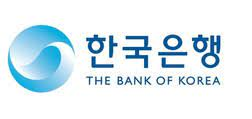 2-1. Ecos API  <br>

https://ecos.bok.or.kr/api/#/ <br>

ECOS는 통계자료를 신속하고 편리하게 제공하기 위해 한국은행이 운영하고 있는 통계전용 홈페이지입니다. <br>
총 596개 지표, 한국경제 이해를 도와주는 100대 지표, 시각화 통계, 화폐가치 계산 기능, 통계 설명자료 포함하고 있습니다. <br><br>

<font size=3>ECOS만의 장점<br>
ECOS는 우리나라의 대표적인 경제통계 포털로서 한국은행이 직접 생산하는 통계 뿐만 아니라 여러 통계기관에서 작성한 통계지표 중 정책수립이나 동향분석에 유용한 지표들도 함께 제공하고 있습니다. <br>
특히 한국은행은 통화/금융, 국민계정, 국제수지, 생산자물가 등 주요 거시경제 통계를 직접 작성하여 ECOS에 공표하기 때문에 가장 빠르고, 가장 정확합니다. <br>

> 통계 코드 검색 : https://ecos.bok.or.kr/api/#/DevGuide/StatisticalCodeSearch  
> 모바일 ver : 2개 이상의 통계표 조회 불가, 산업연관표 파일 다운로드 불가  
> 경제지표 참고 : https://www.bok.or.kr/portal/bbs/P0000605/list.do?menuNo=200462


ECOS API 활용 해보겠습니다. <br>
- EcosDownload(Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3)라는 함수를 만들어 활용 : statcode 값을 넣어, 금리, 소비자물가지수, 부동산가격지수 등의 데이터를 수집 가능

## ECOS API 함수
한국은행 ECOS API를 사용하기 위해서는 개인 인증키 발급을 받아야 합니다. <br>
발급을 받으면 아래 private_api_key = "개인키" 위치에 개인키를 넣고, 각종 거시경제 데이터를 수집 할 수 있습니다. <br>

In [ ]:
import datetime                     
import requests
import pandas as pd
from bs4 import BeautifulSoup

private_api_key = "개인 인증키 발급을 받아서 사용하셔야 합니다!"

# ECOS 에서 데이터를 호출하는 함수를 만듭니다.
def EcosDownload(Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3):
    url = 'http://ecos.bok.or.kr/api/StatisticSearch/%s/xml/kr/1/100000/%s/%s/%s/%s/%s/%s/%s/'%(private_api_key, Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3)
    raw = requests.get(url)
    xml = BeautifulSoup(raw.text,'xml')

    # Pandas 데이터프레임으로 전환합니다.
    raw_data = xml.find_all("row")
    date_list = []
    value_list = []

    for item in raw_data:
        value = item.find('DATA_VALUE').text.encode('utf-8')
        date_str = item.find('TIME').text
        value = float(value)
        date_list.append(datetime.datetime.strptime(date_str,'%Y%m'))
        value_list.append(value)

    df = pd.DataFrame(index = date_list)
    df['value'] = value_list

    return df

In [ ]:
금리 = EcosDownload('722Y001', 'M', '202202', '202206', '0101000','','')
금리.head()

,value
2022-02-01,1.25
2022-03-01,1.25
2022-04-01,1.50
2022-05-01,1.75
2022-06-01,1.75


In [ ]:
소비자물가지수 = EcosDownload('901Y009', 'M', '202111', '202206', '0', '', '')
소비자물가지수.head()

,value
2021-11-01,103.87
2021-12-01,104.04
2022-01-01,104.69
2022-02-01,105.30
2022-03-01,106.06


In [ ]:
부동산가격지수 = EcosDownload('901Y064', 'M', '202111', '202206', 'P65B','','')
부동산가격지수.head()

,value
2021-11-01,0.429
2021-12-01,0.418
2022-01-01,0.368
2022-02-01,0.347
2022-03-01,0.359


# 3. 기업 공시데이터 수집

## 3-1. Dart API

https://github.com/FinanceData/OpenDartReader

Dart API는 공시검색, 기업개황, 공시서류원본파일, 고유번호를 호출 할 수 있습니다. <br>
이를 통해 기업 재무제표 데이터를 수집 할 수 있으며, 홈페이지에서 DART OPEN API 인증키를 발급해야 사용이 가능합니다. <br>
다른 API들과 달리 DART API는 호출시 StockCode가 아닌, Dart의 기업 고유번호(CorpCode)를 호출해야 합니다. <br>

Dart API 활용해서 한눈에 보는 재무제표를 만들어 가는 과정을 살펴도록 하겠습니다. <br>

      api_key : Dart에서 발급받은 API KEY
      corp_code : 기업 고유번호
      year : 보고서 기준년도
      reprt_code : 11013(1분기), 11012(반기), 11014(3분기), 11011(사업)

In [ ]:
#pip install dart-fss

In [ ]:
import dart_fss as dart

api_key='홈페이지에서 신청한 개인키를 사용해주세요'
dart.set_api_key(api_key=api_key)
corp_list = dart.get_corp_list()

Output()

Output()

Output()

## Dart API 함수

(데이터 수집) <br>
Dart API request를 통해 corpCode.xml를 zip파일로 response 받습니다. <br> 
zip 파일에는 공시대상회사의 고유번호, 정식회사명칭, 종목코드, 변경일자가 들어있습니다. <br>
참조: https://opendart.fss.or.kr/guide/detail.do?apiGrpCd=DS001&apiId=2019018

In [ ]:
import requests
from io import BytesIO
from zipfile import ZipFile
from xml.etree.ElementTree import parse
from bs4 import BeautifulSoup
import pandas as pd
from lxml import html
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote
from google.colab import drive
#drive.mount('/content/CORPCODE.xml')

KEY = api_key
url = 'https://opendart.fss.or.kr/api/corpCode.xml'
params = {'crtfc_key' : KEY}
response = requests.get(url, params=params).content

with ZipFile(BytesIO(response)) as zipfile:
  zipfile.extractall('corpCode')


In [ ]:
xmlTree = parse('/content/CORPCODE.xml')
root = xmlTree.getroot()
raw_list = root.findall('list')[:10000]

corp_list = []
for i in range(0, len(raw_list)):
  corp_code = raw_list[i].findtext('corp_code')
  corp_name = raw_list[i].findtext('corp_name')
  stock_code = raw_list[i].findtext('stock_code')
  modify_date = raw_list[i].findtext('modify_date')

  corp_list.append([corp_code, corp_name, stock_code, modify_date])

In [ ]:
from pandas import DataFrame
from datetime import datetime

corp_df = DataFrame(corp_list, columns=['고유번호', '정식명칭', '종목코드', '최종변경일자'])
corp_df.head(10)

,고유번호,정식명칭,종목코드,최종변경일자
0,00434003,다코,,20170630
1,00434456,일산약품,,20170630
2,00430964,굿앤엘에스,,20170630
3,00432403,한라판지,,20170630
4,00388953,크레디피아제이십오차유동화전문회사,,20170630
5,00179984,연방건설산업,,20170630
6,00420143,브룩스피알아이오토메이션잉크,,20170630
7,00401111,매경아이비아이,,20170630
8,00435534,캐드뱅크,,20170630
9,00430186,엠와이오피삼차유동화전문유한회사,,20170630


In [ ]:
import pandas as pd

stock_df = corp_df[corp_df['종목코드'] != " "]
stock_df = stock_df[['고유번호', '정식명칭', '종목코드']].drop_duplicates()
stock_df.head(10)

,고유번호,정식명칭,종목코드
2011,00260985,한빛네트,036720
2023,00264529,엔플렉스,040130
2024,00358545,동서정보기술,055000
2786,00231567,애드모바일,032600
3891,00247939,씨모스,037600
3894,00359614,리더컴,056140
3964,00153551,허메스홀딩스,012400
3997,00344746,유티엑스,045880
4074,00261188,글로포스트,037830
4075,00268020,쏠라엔텍,030390


In [ ]:
### 재무제표 데이터 호출 함수
import requests
from bs4 import BeautifulSoup
import pandas as pd
from lxml import html
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

def get_items(KEY, CORP_CODE, YEAR, RPT_CODE):
    url='https://opendart.fss.or.kr/api/fnlttSinglAcnt.xml'
    params = {
        'crtfc_key' : KEY
        , 'corp_code' : CORP_CODE
        , 'bsns_year' : YEAR
        , 'reprt_code' : RPT_CODE
    }

    response = requests.get(url, params=params).content.decode('UTF-8')

    xml_obj = BeautifulSoup(response, 'html.parser')
    rows = xml_obj.findAll("list")
    
    return rows

In [ ]:
YEAR = '2021'
RPT_CODE = '11011'    # 1분기보고서:11013, 반기보고서:11012, 3분기보고서:11014, 사업보고서:11011
corp_list = stock_df['고유번호'][:10]

item_list = [
'bsns_year', 'stock_code', 'reprt_code', 'fs_div', 'sj_div',
'account_nm', 'thstrm_nm', 'thstrm_dt', 'thstrm_amount', 'thstrm_add_amount',
'frmtrm_nm', 'frmtrm_dt', 'frmtrm_amount', 'frmtrm_add_amount', 'bfefrmtrm_nm',
'bfefrmtrm_dt', 'bfefrmtrm_amount', 'currency'
]

In [ ]:
for c in corp_list:
  CORP_CODE = str(c).zfill(8)
  items = get_items(KEY, CORP_CODE, '2021', RPT_CODE)

for i in range(0, len(items)):
  fs_item_list = []
  for item in item_list:
    try:
      value = items[i].find(item).text
    except:
      value = ''
    fs_item_list.append(value)
  fs_list.append(fs_item_list)
print(CORP_CODE)

00260985
00264529
00358545
00231567
00247939
00359614
00153551
00344746
00261188
00268020


In [ ]:
import pandas as pd
from pandas import DataFrame
from datetime import datetime

fs_df = DataFrame(fs_list, columns=[
'사업연도', '종목코드', '보고서코드', '연결/개별구분', '재무제표구분', 
'계정명', '당기명', '당기일자', '당기금액', '당기누적금액',
'전기명', '전기일자', '전기금액', '전기누적금액', '전전기명',
'전전기일자', '전전기금액', '통화'
])
fs_df = fs_df.drop(index=0, axis=0)
fs_df.head(100)

,사업연도,종목코드,보고서코드,연결/개별구분,재무제표구분,계정명,당기명,당기일자,당기금액,당기누적금액,전기명,전기일자,전기금액,전기누적금액,전전기명,전전기일자,전전기금액,통화
1,2021,005930,11011,CFS,BS,유동자산,제 53 기,2021.12.31 현재,"218,163,185,000,000",,제 52 기,2020.12.31 현재,"198,215,579,000,000",,제 51 기,2019.12.31 현재,"181,385,260,000,000",KRW
2,2021,005930,11011,CFS,BS,비유동자산,제 53 기,2021.12.31 현재,"208,457,973,000,000",,제 52 기,2020.12.31 현재,"180,020,139,000,000",,제 51 기,2019.12.31 현재,"171,179,237,000,000",KRW
3,2021,005930,11011,CFS,BS,자산총계,제 53 기,2021.12.31 현재,"426,621,158,000,000",,제 52 기,2020.12.31 현재,"378,235,718,000,000",,제 51 기,2019.12.31 현재,"352,564,497,000,000",KRW
4,2021,005930,11011,CFS,BS,유동부채,제 53 기,2021.12.31 현재,"88,117,133,000,000",,제 52 기,2020.12.31 현재,"75,604,351,000,000",,제 51 기,2019.12.31 현재,"63,782,764,000,000",KRW
5,2021,005930,11011,CFS,BS,비유동부채,제 53 기,2021.12.31 현재,"33,604,094,000,000",,제 52 기,2020.12.31 현재,"26,683,351,000,000",,제 51 기,2019.12.31 현재,"25,901,312,000,000",KRW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2021,005930,11011,CFS,BS,부채총계,제 53 기,2021.12.31 현재,"121,721,227,000,000",,제 52 기,2020.12.31 현재,"102,287,702,000,000",,제 51 기,2019.12.31 현재,"89,684,076,000,000",KRW
97,2021,005930,11011,CFS,BS,자본금,제 53 기,2021.12.31 현재,"897,514,000,000",,제 52 기,2020.12.31 현재,"897,514,000,000",,제 51 기,2019.12.31 현재,"897,514,000,000",KRW
98,2021,005930,11011,CFS,BS,이익잉여금,제 53 기,2021.12.31 현재,"293,064,763,000,000",,제 52 기,2020.12.31 현재,"271,068,211,000,000",,제 51 기,2019.12.31 현재,"254,582,894,000,000",KRW
99,2021,005930,11011,CFS,BS,자본총계,제 53 기,2021.12.31 현재,"304,899,931,000,000",,제 52 기,2020.12.31 현재,"275,948,016,000,000",,제 51 기,2019.12.31 현재,"262,880,421,000,000",KRW


### 참고) 회사고유정보 데이터 한눈에 보기

In [ ]:
samsung = corp_list.find_by_corp_name(corp_name='삼성전자', exactly=True)[0]
samsung

Label,Data
corp_code,00126380
corp_name,삼성전자
stock_code,005930
modify_date,20220509
sector,통신 및 방송 장비 제조업
product,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반도체제품,사무,계산 및 회계용기계"
corp_cls,Y


# 4. 금융데이터 핸들링

https://pandas.pydata.org/docs/reference/

판다스의 다양한 메서드를 활용해서 데이터 수집 시, 본인이 필요로 하는 형태로 데이터를 가공해서 활용 합니다. <br>
가장 대표적으로 많이 사용하는 3가지 메서드를 살펴 보겠습니다. <br>

핸들링을 위해 삼성전자 2021 - 2022 OHLCV 데이터를 가져와서 진행합니다.

In [ ]:
df_samsung = fdr.DataReader('005930', '2021','2022')
df_samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170


## 4-1. shift
* shift : 인덱스 이동 
    - 전날/다음날 데이터를 Feature로 활용가능
    - 모델링 시 중요 (주가 예측 모델링 시 Target Feature 처리)


데이터 작업을 하면서 다른 행과 비교분석이 필요할 경우 판다스의 shift 함수를 활용할 수 있습니다. <br>
새로 만들어준 Open_shift 컬럼에 Open 값이 하나씩 내려왔습니다. <br>

In [ ]:
df_samsung['Open_shift'] = df_samsung['Open'].shift(1)
df_samsung

,Open,High,Low,Close,Volume,Change,Open_shift
Date,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691,NaN
2021-01-05,81600,83900,81600,83900,35335669,0.010843,81000.0
2021-01-06,83300,84500,82100,82200,42089013,-0.020262,81600.0
2021-01-07,82800,84200,82700,82900,32644642,0.008516,83300.0
2021-01-08,83300,90000,83000,88800,59013307,0.071170,82800.0
...,...,...,...,...,...,...,...
2021-12-24,80200,80800,80200,80500,12086380,0.007509,79800.0
2021-12-27,80600,80600,79800,80200,10783368,-0.003727,80200.0
2021-12-28,80200,80400,79700,80300,18226325,0.001247,80600.0


이런식으로 활용하면 당일종가-전일 종가를 비교 할 수도 있습니다.

In [ ]:
df_samsung['Change_Close'] = df_samsung['Close']-df_samsung['Close'].shift(1)
df_samsung

,Open,High,Low,Close,Volume,Change,Open_shift,Change_Close
Date,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691,NaN,NaN
2021-01-05,81600,83900,81600,83900,35335669,0.010843,81000.0,900.0
2021-01-06,83300,84500,82100,82200,42089013,-0.020262,81600.0,-1700.0
2021-01-07,82800,84200,82700,82900,32644642,0.008516,83300.0,700.0
2021-01-08,83300,90000,83000,88800,59013307,0.071170,82800.0,5900.0
...,...,...,...,...,...,...,...,...
2021-12-24,80200,80800,80200,80500,12086380,0.007509,79800.0,600.0
2021-12-27,80600,80600,79800,80200,10783368,-0.003727,80200.0,-300.0
2021-12-28,80200,80400,79700,80300,18226325,0.001247,80600.0,100.0


### 4.1.1 Change 값 직접 구해보기

In [ ]:
# Change = (종가 - 전일종가) - 1
# df_samsung["Change2"]
df_samsung["Change2"] = df_samsung["Close"] / df_samsung["Close"].shift(1) - 1

In [ ]:
# 불러온 값과 직접 구한 값이 같은지 확인하기
df_samsung[["Change","Change2"]]

,Change,Change2
Date,,
2021-01-04,0.024691358024691468,NaN
2021-01-05,0.010843373493975905,0.010843373493975905
2021-01-06,-0.020262216924910592,-0.020262216924910592
2021-01-07,0.008515815085158085,0.008515815085158085
2021-01-08,0.07117008443908324,0.07117008443908324
...,...,...
2021-12-24,0.007509386733416834,0.007509386733416834
2021-12-27,-0.003726708074534124,-0.003726708074534124
2021-12-28,0.0012468827930174342,0.0012468827930174342


### **4.1.2 pct_change 값 직접 구하기**
* pandas의 pct_change를 사용해서 구해볼 수도 있습니다.

In [ ]:
# pct_change = (종가/전일종가) - 1
df_samsung["pct_change"] = df_samsung["Close"].pct_change()
df_samsung.head()

,Open,High,Low,Close,Volume,Change,Change2,pct_change
Date,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691358024691468,NaN,NaN
2021-01-05,81600,83900,81600,83900,35335669,0.010843373493975905,0.010843373493975905,0.010843373493975905
2021-01-06,83300,84500,82100,82200,42089013,-0.020262216924910592,-0.020262216924910592,-0.020262216924910592
2021-01-07,82800,84200,82700,82900,32644642,0.008515815085158085,0.008515815085158085,0.008515815085158085
2021-01-08,83300,90000,83000,88800,59013307,0.07117008443908324,0.07117008443908324,0.07117008443908324


In [ ]:
# Diff 값 구하기
df_samsung["Diff"] = df_samsung["Close"].diff()

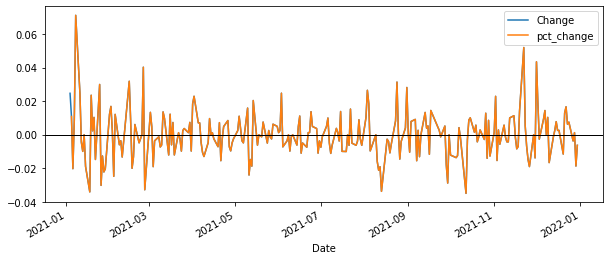

In [ ]:
# "Change", "pct_change" 시각화 하기
import matplotlib.pyplot as plt

df_samsung[["Change", "pct_change"]].plot(figsize=(10,4))
plt.axhline(0, c="k", lw=1)

## 4-2. 이동평균

통계학에서 이동평균(=롤링평균)은 전체 데이터 집합의 여러 하위 집합에 대한 일련의  평균을 만들어 데이터 요소를 분석하는 계산이며,  
이동산술평균(Moving Mean) 또는 롤링산술평균(Rolling Mean)이라고도 합니다. 
<br>  
일련의 연속된 숫자와 고정된 부분 집합 크기가 주어지면, 이동 평균의 첫 번째 요소는 연속된 숫자의 첫 고정 부분 집합의 평균을 취하여 구한다. 
그 다음, "앞으로 이동"하여 하위 집합을 변경한다. 즉, 부분 집합의 첫 번째 숫자를 제외하고 연속된 숫자의 다음 값을 포함시킨다.  
<br>  
* 이동평균의 종류
    * 단순이동평균(Simple Moving Average)
    * 누적이동평균(Cumulative Moving Average)
    * 가중이동평균(Weighted Moving Average)
    * 지수이동평균(Exponential Moving Average)

### **4.2.1 rolling**

* rolling : 이동평균선 계산시 활용

* window : 몇 개의 데이터를 가지고 연산을 할 것인지 결정  
> 의미 : window가 클수록 부드러운 선의 형태를 가지고 있음. window가 center에 있지 않으면, window는 클수록 위상 차가 큼  
* min_periode : 최소한 몇 개의 데이터가 있어야 연산을 할 것인지 결정  
> window 안의 데이터가 min_period보다 적다면, 결과는 NaN  
* center : window의 위치를 window 끝으로 할 것인지 중간으로 할 것인지 결정  
> 의미 : 시계열 데이터에서는 window를 중간으로 할 수 없음(미래의 데이터는 볼 수 없기에)  
* <font color=pink>연산을 mean()으로 했을 경우 "rolling"은 전체적으로 진짜 데이터에서 **잡음(noise)을 제거**하라는 의미</font>

### **4.2.2 expanding**

* window : expanding에서는 window를 결정하지 않음  
> 왜냐하면 window의 크기가 순차적으로 증가하기 때문  
* min_periods : 최소한 몇 개의 데이터가 있어야 연산을 할 것인지 결정  
> rolling과 같음  
* expanding에서의 sum()은 cumsum() 연산과 동일하게 진행되나 NaN이 있을 경우, expanding은 무난하게 처리할 수 있음  
* 연산을 sum()으로 했을 경우, cumsum()과 같은 의미가 있음  
* <font color=pink>연산을 mean()으로 했을 경우, "expanding"은 전체적으로 **추세**를 찾는 의미가 있음</font>  

<br>
<img src = "https://camo.githubusercontent.com/3a6ea642e3bb375103e2099630ffb7e62bd00f7fd8400f36e662a11f06f79288/68747470733a2f2f692e696d6775722e636f6d2f6d4342614362642e706e67">

In [ ]:
df_samsung['avgFiveDay'] = df_samsung['Close'].rolling(window=5).mean()
df_samsung.head(5)

,Open,High,Low,Close,Volume,Change,Change2,pct_change,Diff,avgFiveDay,SMA7,SMA14,CMA7,EWM_short,EWM_long
Date,,,,,,,,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691358024691468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"83,000.0","83,000.0"
2021-01-05,81600,83900,81600,83900,35335669,0.010843373493975905,0.010843373493975905,0.010843373493975905,900.0,NaN,NaN,NaN,NaN,"83,487.5","83,467.30769230769"
2021-01-06,83300,84500,82100,82200,42089013,-0.020262216924910592,-0.020262216924910592,-0.020262216924910592,"-1,700.0",NaN,NaN,NaN,NaN,"82,984.98845265589","83,011.97634302612"
2021-01-07,82800,84200,82700,82900,32644642,0.008515815085158085,0.008515815085158085,0.008515815085158085,700.0,NaN,NaN,NaN,NaN,"82,958.16091954023","82,980.67265083513"
2021-01-08,83300,90000,83000,88800,59013307,0.07117008443908324,0.07117008443908324,0.07117008443908324,"5,900.0","84,160.0",NaN,NaN,NaN,"84,545.36771910466","84,330.19866549778"


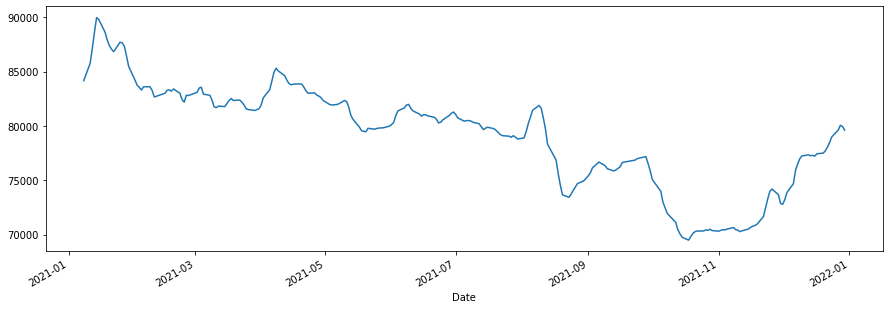

In [ ]:
df_samsung['avgFiveDay'].plot(figsize=(15,5))
plt.show()

### 4.2.3 단순이동평균(SMA : Simple Moving Average) 
* rolling을 사용합니다.

In [ ]:
# 7일, 14일 단순 이동평균 구하기
df_samsung["SMA7"] = df_samsung["Close"].rolling(7).mean()
df_samsung["SMA14"] = df_samsung["Close"].rolling(14).mean()

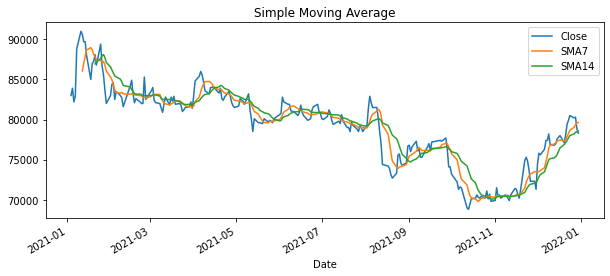

In [ ]:
# 단순이동평균 시각화
df_samsung[["Close", "SMA7", "SMA14"]].plot(figsize=(10,4), title="Simple Moving Average")

### 4.2.4 누적이동평균(Cumulative Moving Average)
* window 창이 시간의 흐름에 따라 증가하기 때문에, expanding을 사용합니다.

In [ ]:
# expanding을 사용하면 window가 시간의 흐름에 따라 증가.
df_samsung["CMA7"] = df_samsung["Close"].expanding(7).mean()

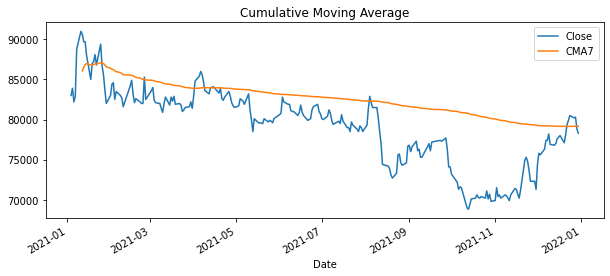

In [ ]:
# 누적이동평균 시각화
df_samsung[["Close","CMA7"]].plot(figsize=(10,4), title="Cumulative Moving Average")

### 4.2.5 지수이동평균(Exponential Moving Average)
* 최근 자료에 가중치를 부여하여 최근 가격 변동을 잘 나타냅니다.

In [ ]:
# 최근 자료에 가중치를 더 주도록 지수 이동평균을 구합니다.
df_samsung["EWM_short"] = df_samsung["Close"].ewm(span=12).mean() # 12거래일로 span 지정
df_samsung["EWM_long"] = df_samsung["Close"].ewm(span=26).mean()
# MACD 지표 사용할 때 주로 활용된다.

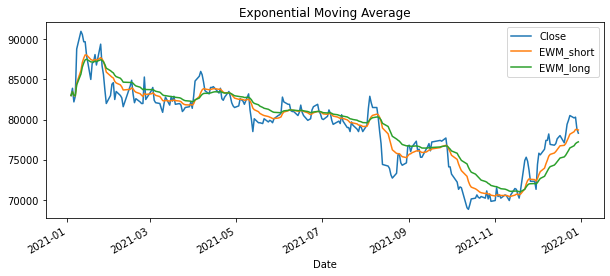

In [ ]:
df_samsung[["Close","EWM_short","EWM_long"]].plot(figsize=(10,4), title="Exponential Moving Average")

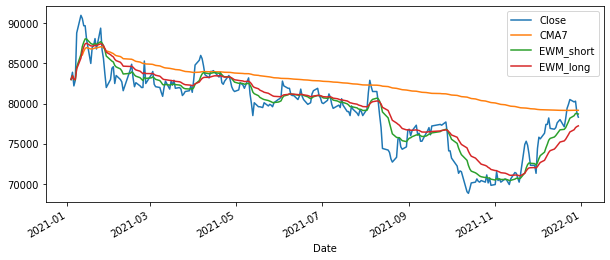

In [ ]:
# 다양한 이동평균 비교하기
df_samsung[["Close", "CMA7", "EWM_short", "EWM_long"]].plot(figsize=(10,4))

* 표 분석

> CMA : window_size가 점점 증가하므로, 가장 완만한 형태
> SMA7 : 종가와 비슷한 흐름.  
> EWM_long : 종가에 비해 조금 완만한 형태

## 4-3. resample

* resample : 기간별 집계 (일단위, 월단위, 연단위)
    - 타 데이터와의 시간 단위를 통일하기 위해 활용
    - 기간별 통계치를 집계하여 추세 확인 가능 
* first() : 그룹 내부에서 첫 번째 데이터를 선택
* last() : 마지막 데이터를 사용
- 업샘플링 : 분,초 단위로 샘플의 빈도수를 증가시킨다.
- 다운샘플링 : 일, 달 단위로 샘플의 빈도수를 감소시킨다.

<br>

판다스의 resample 함수는 시간데이터의 날짜 단위를 바꿔가면서 분석할때 용이하게 사용됩니다. <br>
연(Yearly), 월(Monthly), 주(Weekly), 일(Daily) 단위로 입력이 가능합니다. <br>

df.resample('Y'), df.resample('M'), df.resample('W'), df.resample('D') <br>

위와 같이 resample 함수를 사용해서 시간 간격을 재조정 할수 있습니다. <br>





다음은, 2022년 삼성전자의 ohlcv 값을 가져와, 월말/월초 기준으로 데이터를 정렬 하는 예제입니다.

In [ ]:
df_samsung = stock.get_market_ohlcv_by_date("20220101", "20220708", "005930")
mon = df_samsung.resample('M').first()
print(mon)

               시가     고가     저가     종가       거래량
날짜                                              
2022-01-31  79400  79800  78200  78600  13502112
2022-02-28  74900  74900  73300  73300  17744721
2022-03-31  72300  72400  71500  71700  12481430
2022-04-30  69500  69500  69000  69100  15916846
2022-05-31  66600  67600  66500  67300  14106184
2022-06-30  66600  67000  66400  66700  14959443
2022-07-31  56900  57500  55900  56200  24982097


In [ ]:
month_first = df_samsung.resample('MS').first()
month_first.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2022-01-01,79400,79800,78200,78600,13502112
2022-02-01,74900,74900,73300,73300,17744721
2022-03-01,72300,72400,71500,71700,12481430
2022-04-01,69500,69500,69000,69100,15916846
2022-05-01,66600,67600,66500,67300,14106184
